<a href="https://colab.research.google.com/github/sivasamy1/data_analytics/blob/main/ebola_song.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from tabulate import tabulate

## **PART I**

In [3]:
df_ebola = pd.read_csv('/content/drive/MyDrive/data_analytics/MINIPROJECT_6/ebola_data_db_format.csv')
df = df_ebola.copy()
list(df)


['Indicator', 'Country', 'Date', 'value']

### **1.1 Distinct number of Indicators in the universe (complete dataset).**
### **Expected Output:**
### **Integer value**


In [4]:
print(df['Country'].unique())
indicators = df['Indicator'].nunique()
print("Distinct # if indicators:\n", indicators)

['Guinea' 'Liberia' 'Sierra Leone' 'United Kingdom' 'Mali' 'Nigeria'
 'Senegal' 'Spain' 'United States of America' 'Italy' 'Liberia 2'
 'Guinea 2']
Distinct # if indicators:
 36


### **1.2 In the second half of the year 2015, how many countries have one or more “Cumulative number of confirmed Ebola cases”**
### **Expected Output:**
### **Integer value**


In [5]:
import datetime

In [6]:
def get_year(row):
    return datetime.datetime.strptime(row['Date'], '%Y-%m-%d').year


In [7]:
df["year"] = df.apply(get_year, axis=1)
df_ebola_2015 = df[(df['Date'] >= "2015-07-01") & (df['Date'] <= "2015-12-31")]
df_ebola_2015 = df.where(df["Indicator"] == "Cumulative number of confirmed Ebola cases").groupby(['Country']).size().to_frame("count").reset_index()
print(len(pd.unique(df_ebola_2015['Country'])))

12


### **1.3 Top 10 total Ebola cases confirmed. Note that Indicator = Cumulative number of confirmed Ebola cases. Include rank based on the total value (=cases confirmed).**
### **Expected Output:**
### **country, total_value, rank**


In [8]:
confirmed2 = df.where(df['Indicator'] == "Cumulative number of confirmed Ebola cases")\
            .groupby(["Country"]).size().nlargest(10).to_frame('total_value').reset_index()

confirmed2['rank'] = confirmed2['total_value'].rank(ascending=False)
print(tabulate(confirmed2, headers='keys', tablefmt='github'))

|    | Country                  |   total_value |   rank |
|----|--------------------------|---------------|--------|
|  0 | Guinea                   |           259 |    1.5 |
|  1 | Sierra Leone             |           259 |    1.5 |
|  2 | Liberia                  |           258 |    3   |
|  3 | Nigeria                  |           255 |    4   |
|  4 | Senegal                  |           254 |    5   |
|  5 | United States of America |           245 |    6   |
|  6 | Mali                     |           243 |    7.5 |
|  7 | Spain                    |           243 |    7.5 |
|  8 | United Kingdom           |           221 |    9   |
|  9 | Italy                    |           141 |   10   |


### **1.4 Top 10 countries that have total cases with Indicator = “Cumulative number of confirmed, probable and suspected Ebola deaths” in 2015 Q2 (i.e., April-June 2015).**
### **Expected Output:**
### **country, total_cases, rank**


In [9]:
confirmed = df[(df['Date'] >= '2015-04-01') & (df['Date'] <= '2015-06-30')]
confirmed = df.where(df['Indicator'] == "Cumulative number of confirmed, probable and suspected Ebola deaths")\
      .groupby(['Country']).size().to_frame('total_cases').reset_index()
confirmed['rank'] = confirmed['total_cases'].rank(ascending=False)
confirmed = confirmed.sort_values(by=['rank'], ascending=True)

print(tabulate(confirmed.head(10), headers='keys', tablefmt='github'))

|    | Country                  |   total_cases |   rank |
|----|--------------------------|---------------|--------|
|  0 | Guinea                   |           259 |    2   |
|  3 | Liberia                  |           259 |    2   |
|  8 | Sierra Leone             |           259 |    2   |
|  6 | Nigeria                  |           255 |    4   |
|  7 | Senegal                  |           254 |    5   |
| 11 | United States of America |           245 |    6   |
|  5 | Mali                     |           243 |    7.5 |
|  9 | Spain                    |           243 |    7.5 |
| 10 | United Kingdom           |           221 |    9   |
|  2 | Italy                    |           141 |   10   |


### **1.5 Top 10 countries that have total cases with Indicator = “Cumulative number of confirmed probable and suspected Ebola deaths” with only even months of the year 2015 (i.e., months 2, 4, 6, 8, 10, 12).**
### **Expected Output:**
### **country, total_cases, rank**


In [10]:
def get_month(row):
    return datetime.datetime.strptime(row['Date'], '%Y-%m-%d').month    # Separating month to a new column helps in sorting
def is_even_odd(row):
  return int(row['month']%2)

In [11]:
df = df_ebola.copy()

df['month'] = df.apply(get_month, axis=1)
confirmed = df[df['month'] % 2 == 0]
df_ebola_2015 = confirmed[(confirmed['Date'] >= "2015-01-01") & (confirmed['Date'] <= "2015-12-31")]

confirmed = df_ebola_2015[df_ebola_2015['Indicator'] == "Cumulative number of confirmed, probable and suspected Ebola deaths"]\
       .groupby(['Country']).size().to_frame('total_cases').reset_index()
confirmed['rank'] = confirmed['total_cases'].rank(ascending=False)
confirmed = confirmed.sort_values('rank')


print('Even months 2015')
print(tabulate(confirmed.head(10), headers='keys', tablefmt='github'))

confirmed1 = df[df['month'] % 2 == 1]
df_ebola_2015 = confirmed1[(confirmed1['Date'] >= "2015-01-01") & (confirmed1['Date'] <= "2015-12-31")]

confirmed = df_ebola_2015[df_ebola_2015['Indicator'] == "Cumulative number of confirmed, probable and suspected Ebola deaths"]\
       .groupby(['Country']).size().to_frame('total_cases').reset_index()
confirmed['rank'] = confirmed['total_cases'].rank(ascending=False)
confirmed1 = confirmed.sort_values('rank')

print('Odd months 2015')
print(tabulate(confirmed1.head(10), headers='keys', tablefmt='github'))

Even months 2015
|    | Country                  |   total_cases |   rank |
|----|--------------------------|---------------|--------|
|  0 | Guinea                   |           105 |      5 |
|  2 | Liberia                  |           105 |      5 |
|  4 | Mali                     |           105 |      5 |
|  5 | Nigeria                  |           105 |      5 |
|  6 | Senegal                  |           105 |      5 |
|  7 | Sierra Leone             |           105 |      5 |
|  8 | Spain                    |           105 |      5 |
|  9 | United Kingdom           |           105 |      5 |
| 10 | United States of America |           105 |      5 |
|  1 | Italy                    |            72 |     10 |
Odd months 2015
|    | Country                  |   total_cases |   rank |
|----|--------------------------|---------------|--------|
|  0 | Guinea                   |           115 |    3   |
|  2 | Liberia                  |           115 |    3   |
|  4 | Mali            

### **1.6 Find Country and Indicator wise total value. Also, rank on the total_value which is the sum at the Country-Indicator level.**
### **Expected Output:**
### **country, indicator, total_value, country_indicator_rank**


In [12]:
country_columns = df['Country'].unique()
confirmed = df.groupby(['Country', 'Indicator'])['value'].size().reset_index(name='total_value')
confirmed['country_indicator_rank'] = confirmed['total_value'].rank(ascending=False)

confirmed['Country'] = pd.Categorical(confirmed['Country'], categories=country_columns, ordered=True)

print(tabulate(confirmed, headers='keys', tablefmt='github'))


|     | Country                  | Indicator                                                                                   |   total_value |   country_indicator_rank |
|-----|--------------------------|---------------------------------------------------------------------------------------------|---------------|--------------------------|
|   0 | Guinea                   | Case fatality rate (CFR) of confirmed Ebola cases                                           |             4 |                    127   |
|   1 | Guinea                   | Case fatality rate (CFR) of confirmed, probable and suspected Ebola cases                   |             4 |                    127   |
|   2 | Guinea                   | Case fatality rate (CFR) of probable Ebola cases                                            |             4 |                    127   |
|   3 | Guinea                   | Case fatality rate (CFR) of suspected Ebola cases                                           |            

### **1.7 For those Top 10 countries by Indicator = Cumulative number of confirmed Ebola cases, plot group bar chart.**

X-axis -> Country

Y-axis -> Bar 1 -> total_value with Indicator = Cumulative number of suspected Ebola cases

Y-axis -> Bar 2 ->  total_value with Indicator = Cumulative number of confirmed Ebola cases


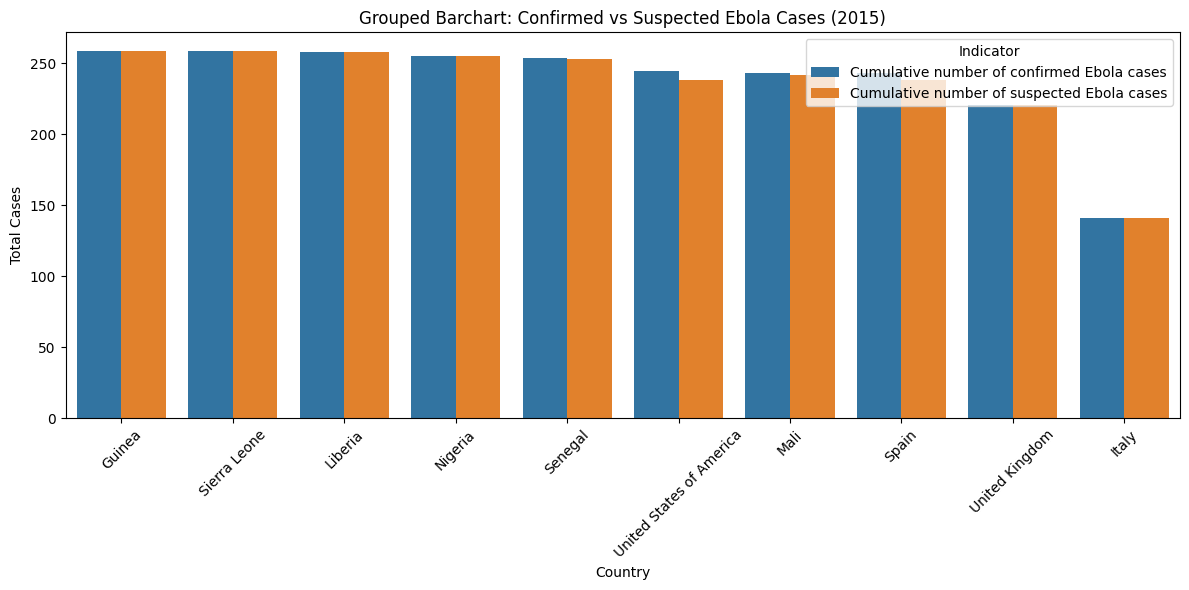

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
df = df_ebola.copy()

confirmed2 = df.where(df['Indicator'] == "Cumulative number of confirmed Ebola cases")\
            .groupby(["Country"]).size().to_frame('Cumulative number of confirmed Ebola cases').reset_index()
confirmed2['rank'] = confirmed2['Cumulative number of confirmed Ebola cases'].rank(ascending=False)
confirmed2 = confirmed2.sort_values('rank').head(10)
confirmed2.rename(columns={'value': 'Cumulative number of confirmed Ebola cases'}, inplace=True)
confirmed3 = df.where(df['Indicator'] == "Cumulative number of suspected Ebola cases")\
            .groupby(["Country"]).size().to_frame('Cumulative number of suspected Ebola cases').reset_index()
confirmed3['rank'] = confirmed3['Cumulative number of suspected Ebola cases'].rank(ascending=False)
confirmed3 = confirmed3.sort_values('rank').head(10)
confirmed3.rename(columns={'value': 'Cumulative number of suspected Ebola cases'}, inplace=True)

confirmed2 = pd.merge(confirmed2, confirmed3, on='Country')
melted = confirmed2.melt(id_vars='Country', value_vars=['Cumulative number of confirmed Ebola cases', 'Cumulative number of suspected Ebola cases'],
                     var_name='Indicator', value_name='Total')
plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='Country', y='Total', hue='Indicator')
plt.title('Grouped Barchart: Confirmed vs Suspected Ebola Cases (2015)')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **PART II**

In [14]:
import pandas as pd
from tabulate import tabulate

df1 = pd.read_csv('/content/drive/MyDrive/data_analytics/MINIPROJECT_6/song.csv')
print(tabulate(df, headers='keys', tablefmt='github'))

|       | Indicator                                                                                   | Country                  | Date       |   value |
|-------|---------------------------------------------------------------------------------------------|--------------------------|------------|---------|
|     0 | Cumulative number of confirmed, probable and suspected Ebola cases                          | Guinea                   | 2015-03-10 |  3285   |
|     1 | Cumulative number of confirmed Ebola cases                                                  | Guinea                   | 2015-03-10 |  2871   |
|     2 | Cumulative number of probable Ebola cases                                                   | Guinea                   | 2015-03-10 |   392   |
|     3 | Cumulative number of suspected Ebola cases                                                  | Guinea                   | 2015-03-10 |    22   |
|     4 | Cumulative number of confirmed, probable and suspected Ebola death

In [15]:
print(df1.columns)
print(df1.head())

Index(['song_title', 'rank', 'year'], dtype='object')
  song_title  rank  year
0    Mysong1     1  2012
1    Mysong1     1  2013
2    Mysong1     2  2014
3    Mysong1     3  2015
4    Mysong2     2  2012


## **2.1 Read "song.csv" into a dataframe and then produce the following output.**
### **Write Output For Ranked Songs By its Highest Frequency. Whichever song won a particular rank (say 2) with maximum frequency takes that place. For example, Mysong1 won rank 1 for two different years (achieved maximum frequency for that particular rank) and so in output (see row 1 in Output expected below), it should appear as Mysong1 with rank 1 and count 2..**
### **(Note. in the same year, now two songs have same rank.)**


In [16]:
df_freq = df1.groupby(['song_title', 'rank']).size().reset_index(name='count')
df_freq = df_freq.loc[df_freq.groupby('rank')['count'].idxmax()].reset_index(drop=True)
df_freq = df_freq.sort_values(by='rank').reset_index(drop=True)
print(df_freq)

  song_title  rank  count
0    Mysong1     1      2
1    Mysong2     2      3
2    Mysong3     3      2


## **PART III**

In [2]:
import pandas as pd
from tabulate import tabulate

df2 = pd.read_csv('/content/drive/MyDrive/data_analytics/MINIPROJECT_6/Housing.csv')
print(tabulate(df2.head(10), headers='keys', tablefmt='github'))
list(df2)

|    |    price |   area |   bedrooms |   bathrooms |   stories | mainroad   | guestroom   | basement   | hotwaterheating   | airconditioning   |   parking | prefarea   | furnishingstatus   |
|----|----------|--------|------------|-------------|-----------|------------|-------------|------------|-------------------|-------------------|-----------|------------|--------------------|
|  0 | 13300000 |   7420 |          4 |           2 |         3 | yes        | no          | no         | no                | yes               |         2 | yes        | furnished          |
|  1 | 12250000 |   8960 |          4 |           4 |         4 | yes        | no          | no         | no                | yes               |         3 | no         | furnished          |
|  2 | 12250000 |   9960 |          3 |           2 |         2 | yes        | no          | yes        | no                | no                |         2 | yes        | semi-furnished     |
|  3 | 12215000 |   7500 |          4 | 

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

### **3.1 Pre-processing: Convert non-numeric columns (mainroad, guestroom, basement, hotwaterheating, airconditioning) to numeric using one-hot encoding if the column values are not interrelated. If column values are related, need to use ordinal encoding.**

In [26]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
df0 = df2.loc[:, ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']]
one_hot_enc = OneHotEncoder(handle_unknown='error', sparse_output=False)
arr = one_hot_enc.fit_transform(df0)
df_pre = pd.DataFrame(arr, columns=one_hot_enc.get_feature_names_out(df0.columns))
df_pre = pd.concat([df2.loc[:, ['price','area','bedrooms','bathrooms']].reset_index(drop=True), df_pre.reset_index(drop=True)], axis=1)
print(tabulate(df_pre, headers='keys', tablefmt='github'))

|     |       price |   area |   bedrooms |   bathrooms |   mainroad_no |   mainroad_yes |   guestroom_no |   guestroom_yes |   basement_no |   basement_yes |   hotwaterheating_no |   hotwaterheating_yes |   airconditioning_no |   airconditioning_yes |   prefarea_no |   prefarea_yes |
|-----|-------------|--------|------------|-------------|---------------|----------------|----------------|-----------------|---------------|----------------|----------------------|-----------------------|----------------------|-----------------------|---------------|----------------|
|   0 | 1.33e+07    |   7420 |          4 |           2 |             0 |              1 |              1 |               0 |             1 |              0 |                    1 |                     0 |                    0 |                     1 |             0 |              1 |
|   1 | 1.225e+07   |   8960 |          4 |           4 |             0 |              1 |              1 |               0 |             1 | 

### **3.2 Pre-processing: Use pd.get_dummies to convert the one-hot encoding from the previous step into single columns.**

In [30]:
df_dum = pd.get_dummies(df2, dtype='int')
print(tabulate(df_dum, headers='keys', tablefmt='github'))

|     |       price |   area |   bedrooms |   bathrooms |   stories |   parking |   mainroad_no |   mainroad_yes |   guestroom_no |   guestroom_yes |   basement_no |   basement_yes |   hotwaterheating_no |   hotwaterheating_yes |   airconditioning_no |   airconditioning_yes |   prefarea_no |   prefarea_yes |   furnishingstatus_furnished |   furnishingstatus_semi-furnished |   furnishingstatus_unfurnished |
|-----|-------------|--------|------------|-------------|-----------|-----------|---------------|----------------|----------------|-----------------|---------------|----------------|----------------------|-----------------------|----------------------|-----------------------|---------------|----------------|------------------------------|-----------------------------------|--------------------------------|
|   0 | 1.33e+07    |   7420 |          4 |           2 |         3 |         2 |             0 |              1 |              1 |               0 |             1 |              0